<a href="https://colab.research.google.com/github/nuwanlakshitha/ML/blob/master/ML_knn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [0]:
import itertools
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import NullFormatter
import pandas as pd
import numpy as np
import matplotlib.ticker as ticker
from sklearn import preprocessing
%matplotlib inline

In [0]:
df = pd.read_csv('/content/drive/My Drive/ML/train.csv')
df

,tripid,additional_fare,duration,meter_waiting,meter_waiting_fare,meter_waiting_till_pickup,pickup_time,drop_time,pick_lat,pick_lon,drop_lat,drop_lon,fare,label
0,189123628,10.5,834.0,56.0,0.0000,64.0,11/1/2019 0:20,11/1/2019 0:34,6.86252,79.8993,6.90330,79.8783,270.32,correct
1,189125358,10.5,791.0,47.0,0.0000,134.0,11/1/2019 0:56,11/1/2019 1:09,6.88589,79.8984,6.91373,79.8923,197.85,correct
2,189125719,10.5,1087.0,80.0,0.0000,61.0,11/1/2019 1:08,11/1/2019 1:26,6.90839,79.8651,6.93669,79.9146,301.64,correct
3,189127273,10.5,598.0,271.0,15.6638,68.0,11/1/2019 2:27,11/1/2019 2:37,6.92570,79.8895,6.92748,79.8971,82.30,correct
4,189128020,NaN,NaN,NaN,NaN,NaN,11/1/2019 3:34,11/1/2019 3:51,6.87441,79.8615,6.84478,79.9290,358.39,correct
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17171,213803193,10.5,838.0,93.0,5.4219,451.0,1/31/2020 22:07,1/31/2020 22:21,7.29073,80.6367,7.28891,80.6557,198.26,correct
17172,213812756,10.5,2151.0,428.0,0.0000,39.0,1/31/2020 23:07,1/31/2020 23:43,6.90569,79.8516,6.95089,79.9389,581.23,correct
17173,213813930,10.5,263.0,9.0,0.0000,110.0,1/31/2020 23:21,1/31/2020 23:25,7.09210,79.9000,7.10135,79.9017,76.20,correct
17174,213815405,10.5,858.0,115.0,0.0000,317.0,1/31/2020 23:39,1/31/2020 23:53,6.94540,79.8768,6.93574,79.9010,133.31,correct


In [0]:
df.dtypes

tripid                         int64
additional_fare              float64
duration                     float64
meter_waiting                float64
meter_waiting_fare           float64
meter_waiting_till_pickup    float64
pickup_time                   object
drop_time                     object
pick_lat                     float64
pick_lon                     float64
drop_lat                     float64
drop_lon                     float64
fare                         float64
label                         object
dtype: object

In [0]:
df['pickup_time'] = pd.to_datetime(df['pickup_time'])
df['drop_time'] = pd.to_datetime(df['drop_time'])
df

,tripid,additional_fare,duration,meter_waiting,meter_waiting_fare,meter_waiting_till_pickup,pickup_time,drop_time,pick_lat,pick_lon,drop_lat,drop_lon,fare,label
0,189123628,10.5,834.0,56.0,0.0000,64.0,2019-11-01 00:20:00,2019-11-01 00:34:00,6.86252,79.8993,6.90330,79.8783,270.32,correct
1,189125358,10.5,791.0,47.0,0.0000,134.0,2019-11-01 00:56:00,2019-11-01 01:09:00,6.88589,79.8984,6.91373,79.8923,197.85,correct
2,189125719,10.5,1087.0,80.0,0.0000,61.0,2019-11-01 01:08:00,2019-11-01 01:26:00,6.90839,79.8651,6.93669,79.9146,301.64,correct
3,189127273,10.5,598.0,271.0,15.6638,68.0,2019-11-01 02:27:00,2019-11-01 02:37:00,6.92570,79.8895,6.92748,79.8971,82.30,correct
4,189128020,NaN,NaN,NaN,NaN,NaN,2019-11-01 03:34:00,2019-11-01 03:51:00,6.87441,79.8615,6.84478,79.9290,358.39,correct
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17171,213803193,10.5,838.0,93.0,5.4219,451.0,2020-01-31 22:07:00,2020-01-31 22:21:00,7.29073,80.6367,7.28891,80.6557,198.26,correct
17172,213812756,10.5,2151.0,428.0,0.0000,39.0,2020-01-31 23:07:00,2020-01-31 23:43:00,6.90569,79.8516,6.95089,79.9389,581.23,correct
17173,213813930,10.5,263.0,9.0,0.0000,110.0,2020-01-31 23:21:00,2020-01-31 23:25:00,7.09210,79.9000,7.10135,79.9017,76.20,correct
17174,213815405,10.5,858.0,115.0,0.0000,317.0,2020-01-31 23:39:00,2020-01-31 23:53:00,6.94540,79.8768,6.93574,79.9010,133.31,correct


In [0]:
df.replace(to_replace=['correct', 'incorrect'], value=[1, 0], inplace=True)
df['label'].value_counts()

1    15495
0     1681
Name: label, dtype: int64

In [0]:
del df['tripid']
df

,additional_fare,duration,meter_waiting,meter_waiting_fare,meter_waiting_till_pickup,pickup_time,drop_time,pick_lat,pick_lon,drop_lat,drop_lon,fare,label
0,10.5,834.0,56.0,0.0000,64.0,2019-11-01 00:20:00,2019-11-01 00:34:00,6.86252,79.8993,6.90330,79.8783,270.32,1
1,10.5,791.0,47.0,0.0000,134.0,2019-11-01 00:56:00,2019-11-01 01:09:00,6.88589,79.8984,6.91373,79.8923,197.85,1
2,10.5,1087.0,80.0,0.0000,61.0,2019-11-01 01:08:00,2019-11-01 01:26:00,6.90839,79.8651,6.93669,79.9146,301.64,1
3,10.5,598.0,271.0,15.6638,68.0,2019-11-01 02:27:00,2019-11-01 02:37:00,6.92570,79.8895,6.92748,79.8971,82.30,1
4,NaN,NaN,NaN,NaN,NaN,2019-11-01 03:34:00,2019-11-01 03:51:00,6.87441,79.8615,6.84478,79.9290,358.39,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
17171,10.5,838.0,93.0,5.4219,451.0,2020-01-31 22:07:00,2020-01-31 22:21:00,7.29073,80.6367,7.28891,80.6557,198.26,1
17172,10.5,2151.0,428.0,0.0000,39.0,2020-01-31 23:07:00,2020-01-31 23:43:00,6.90569,79.8516,6.95089,79.9389,581.23,1
17173,10.5,263.0,9.0,0.0000,110.0,2020-01-31 23:21:00,2020-01-31 23:25:00,7.09210,79.9000,7.10135,79.9017,76.20,1
17174,10.5,858.0,115.0,0.0000,317.0,2020-01-31 23:39:00,2020-01-31 23:53:00,6.94540,79.8768,6.93574,79.9010,133.31,1


In [0]:
X = df.columns
X = df[X[0:12]]
X

,additional_fare,duration,meter_waiting,meter_waiting_fare,meter_waiting_till_pickup,pickup_time,drop_time,pick_lat,pick_lon,drop_lat,drop_lon,fare
0,10.5,834.0,56.0,0.0000,64.0,2019-11-01 00:20:00,2019-11-01 00:34:00,6.86252,79.8993,6.90330,79.8783,270.32
1,10.5,791.0,47.0,0.0000,134.0,2019-11-01 00:56:00,2019-11-01 01:09:00,6.88589,79.8984,6.91373,79.8923,197.85
2,10.5,1087.0,80.0,0.0000,61.0,2019-11-01 01:08:00,2019-11-01 01:26:00,6.90839,79.8651,6.93669,79.9146,301.64
3,10.5,598.0,271.0,15.6638,68.0,2019-11-01 02:27:00,2019-11-01 02:37:00,6.92570,79.8895,6.92748,79.8971,82.30
4,NaN,NaN,NaN,NaN,NaN,2019-11-01 03:34:00,2019-11-01 03:51:00,6.87441,79.8615,6.84478,79.9290,358.39
...,...,...,...,...,...,...,...,...,...,...,...,...
17171,10.5,838.0,93.0,5.4219,451.0,2020-01-31 22:07:00,2020-01-31 22:21:00,7.29073,80.6367,7.28891,80.6557,198.26
17172,10.5,2151.0,428.0,0.0000,39.0,2020-01-31 23:07:00,2020-01-31 23:43:00,6.90569,79.8516,6.95089,79.9389,581.23
17173,10.5,263.0,9.0,0.0000,110.0,2020-01-31 23:21:00,2020-01-31 23:25:00,7.09210,79.9000,7.10135,79.9017,76.20
17174,10.5,858.0,115.0,0.0000,317.0,2020-01-31 23:39:00,2020-01-31 23:53:00,6.94540,79.8768,6.93574,79.9010,133.31


In [0]:
y = df['label'].values
y

array([1, 1, 1, ..., 1, 1, 1])

In [0]:
from numpy import nan
from numpy import isnan
from sklearn.impute import SimpleImputer

imp_features = [['additional_fare','duration','meter_waiting','meter_waiting_fare','meter_waiting_till_pickup','pick_lat','pick_lon','drop_lat','drop_lon','fare']]

for feature in imp_features:
  imputer = SimpleImputer(missing_values=nan, strategy='mean')
  transformed_values = imputer.fit_transform(X[feature].values)
  X[feature] = transformed_values
X

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.
/usr/local/lib/python3.6/dist-packages/pandas/core/indexing.py:966: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


,additional_fare,duration,meter_waiting,meter_waiting_fare,meter_waiting_till_pickup,pickup_time,drop_time,pick_lat,pick_lon,drop_lat,drop_lon,fare
0,10.500000,834.000000,56.000000,0.000000,64.000000,2019-11-01 00:20:00,2019-11-01 00:34:00,6.86252,79.8993,6.90330,79.8783,270.32
1,10.500000,791.000000,47.000000,0.000000,134.000000,2019-11-01 00:56:00,2019-11-01 01:09:00,6.88589,79.8984,6.91373,79.8923,197.85
2,10.500000,1087.000000,80.000000,0.000000,61.000000,2019-11-01 01:08:00,2019-11-01 01:26:00,6.90839,79.8651,6.93669,79.9146,301.64
3,10.500000,598.000000,271.000000,15.663800,68.000000,2019-11-01 02:27:00,2019-11-01 02:37:00,6.92570,79.8895,6.92748,79.8971,82.30
4,13.719651,1702.858077,629.074231,32.057666,112.466832,2019-11-01 03:34:00,2019-11-01 03:51:00,6.87441,79.8615,6.84478,79.9290,358.39
...,...,...,...,...,...,...,...,...,...,...,...,...
17171,10.500000,838.000000,93.000000,5.421900,451.000000,2020-01-31 22:07:00,2020-01-31 22:21:00,7.29073,80.6367,7.28891,80.6557,198.26
17172,10.500000,2151.000000,428.000000,0.000000,39.000000,2020-01-31 23:07:00,2020-01-31 23:43:00,6.90569,79.8516,6.95089,79.9389,581.23
17173,10.500000,263.000000,9.000000,0.000000,110.000000,2020-01-31 23:21:00,2020-01-31 23:25:00,7.09210,79.9000,7.10135,79.9017,76.20
17174,10.500000,858.000000,115.000000,0.000000,317.000000,2020-01-31 23:39:00,2020-01-31 23:53:00,6.94540,79.8768,6.93574,79.9010,133.31


In [0]:
del X['drop_time']
del X['pickup_time']
X

,additional_fare,duration,meter_waiting,meter_waiting_fare,meter_waiting_till_pickup,pick_lat,pick_lon,drop_lat,drop_lon,fare
0,10.500000,834.000000,56.000000,0.000000,64.000000,6.86252,79.8993,6.90330,79.8783,270.32
1,10.500000,791.000000,47.000000,0.000000,134.000000,6.88589,79.8984,6.91373,79.8923,197.85
2,10.500000,1087.000000,80.000000,0.000000,61.000000,6.90839,79.8651,6.93669,79.9146,301.64
3,10.500000,598.000000,271.000000,15.663800,68.000000,6.92570,79.8895,6.92748,79.8971,82.30
4,13.719651,1702.858077,629.074231,32.057666,112.466832,6.87441,79.8615,6.84478,79.9290,358.39
...,...,...,...,...,...,...,...,...,...,...
17171,10.500000,838.000000,93.000000,5.421900,451.000000,7.29073,80.6367,7.28891,80.6557,198.26
17172,10.500000,2151.000000,428.000000,0.000000,39.000000,6.90569,79.8516,6.95089,79.9389,581.23
17173,10.500000,263.000000,9.000000,0.000000,110.000000,7.09210,79.9000,7.10135,79.9017,76.20
17174,10.500000,858.000000,115.000000,0.000000,317.000000,6.94540,79.8768,6.93574,79.9010,133.31


In [0]:
from sklearn.metrics import jaccard_similarity_score
from sklearn.metrics import f1_score
from sklearn.metrics import log_loss
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsClassifier

X_train, y_train = X,y

bestScore=0.0
accList=[]
for k in range(3,15):
    clf_knn = KNeighborsClassifier(n_neighbors=k,algorithm='auto')
    
    scores = cross_val_score(clf_knn, X, y, cv=10)
    score=scores.mean()
    accList.append(score)
    
    if score > bestScore:
        bestScore=score
        best_clf=clf_knn
        bestK=k
print("Best K is :",bestK,"| Cross validation Accuracy :",bestScore)
clf_knn=best_clf

Best K is : 8 | Cross validation Accuracy : 0.9406727764469934


In [0]:
clf_knn.fit(X_train,y_train)
y_pred=best_clf.predict(X_train)
trainScores={}

In [0]:
trainScores['KNN-jaccard']=jaccard_similarity_score(y_train, y_pred)
trainScores['KNN-f1-score']=f1_score(y_train, y_pred, average='weighted')
trainScores

/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:664: FutureWarning: jaccard_similarity_score has been deprecated and replaced with jaccard_score. It will be removed in version 0.23. This implementation has surprising behavior for binary and multiclass classification tasks.
  FutureWarning)


{'KNN-f1-score': 0.9472994785762464, 'KNN-jaccard': 0.9512109920819748}

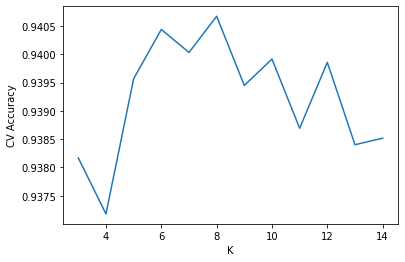

In [0]:
plt.plot(range(3,15),accList)
plt.xlabel('K')
plt.ylabel('CV Accuracy')
plt.show()

In [0]:
test_df = pd.read_csv('/content/drive/My Drive/ML/test.csv')
test_df

,tripid,additional_fare,duration,meter_waiting,meter_waiting_fare,meter_waiting_till_pickup,pickup_time,drop_time,pick_lat,pick_lon,drop_lat,drop_lon,fare
0,213284604,10.5,924,42,2.44860,148,2/1/2020 0:38,2/1/2020 0:53,6.83454,79.8750,6.77490,79.8840,289.27
1,213286352,10.5,4249,20,0.00000,91,2/1/2020 1:02,2/1/2020 2:13,6.91168,79.8723,6.55091,79.9706,1912.70
2,213293973,10.5,1552,255,2.65880,23,2/1/2020 5:02,2/1/2020 5:28,6.92145,79.8478,6.90539,79.8989,394.00
3,213294622,10.5,462,16,0.00000,198,2/1/2020 5:30,2/1/2020 5:38,6.77433,79.9416,6.80401,79.9407,154.32
4,213298687,10.5,814,392,12.36920,69,2/1/2020 7:00,2/1/2020 7:14,6.97968,79.9130,6.98875,79.8914,147.47
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8571,222856243,10.5,1723,429,24.83332,3,3/16/2020 21:28,3/16/2020 21:56,6.85103,79.9567,6.85588,79.9214,388.48
8572,222857785,10.5,1378,80,0.00000,125,3/16/2020 21:59,3/16/2020 22:22,6.91293,79.9656,6.92112,79.8980,379.85
8573,222858416,10.5,418,56,3.28440,93,3/16/2020 22:02,3/16/2020 22:09,6.85718,79.9081,6.83868,79.9083,112.79
8574,222858691,10.5,1604,548,31.67440,17,3/16/2020 22:07,3/16/2020 22:34,6.91289,79.8846,6.93159,79.9145,248.46


In [0]:
test_X = test_df[test_df.columns]

In [0]:
del test_X['tripid']
del test_X['drop_time']
del test_X['pickup_time']
test_X

,additional_fare,duration,meter_waiting,meter_waiting_fare,meter_waiting_till_pickup,pick_lat,pick_lon,drop_lat,drop_lon,fare
0,10.5,924,42,2.44860,148,6.83454,79.8750,6.77490,79.8840,289.27
1,10.5,4249,20,0.00000,91,6.91168,79.8723,6.55091,79.9706,1912.70
2,10.5,1552,255,2.65880,23,6.92145,79.8478,6.90539,79.8989,394.00
3,10.5,462,16,0.00000,198,6.77433,79.9416,6.80401,79.9407,154.32
4,10.5,814,392,12.36920,69,6.97968,79.9130,6.98875,79.8914,147.47
...,...,...,...,...,...,...,...,...,...,...
8571,10.5,1723,429,24.83332,3,6.85103,79.9567,6.85588,79.9214,388.48
8572,10.5,1378,80,0.00000,125,6.91293,79.9656,6.92112,79.8980,379.85
8573,10.5,418,56,3.28440,93,6.85718,79.9081,6.83868,79.9083,112.79
8574,10.5,1604,548,31.67440,17,6.91289,79.8846,6.93159,79.9145,248.46


In [0]:
# imp_features = [['additional_fare','duration','meter_waiting','meter_waiting_fare','meter_waiting_till_pickup','pick_lat','pick_lon','drop_lat','drop_lon','fare']]

# for feature in imp_features:
#   imputer = SimpleImputer(missing_values=nan, strategy='mean')
#   transformed_values = imputer.fit_transform(test_df[feature].values)
# test_df

,additional_fare,duration,meter_waiting,meter_waiting_fare,meter_waiting_till_pickup,pick_lat,pick_lon,drop_lat,drop_lon,fare
0,10.5,924,42,2.44860,148,6.83454,79.8750,6.77490,79.8840,289.27
1,10.5,4249,20,0.00000,91,6.91168,79.8723,6.55091,79.9706,1912.70
2,10.5,1552,255,2.65880,23,6.92145,79.8478,6.90539,79.8989,394.00
3,10.5,462,16,0.00000,198,6.77433,79.9416,6.80401,79.9407,154.32
4,10.5,814,392,12.36920,69,6.97968,79.9130,6.98875,79.8914,147.47
...,...,...,...,...,...,...,...,...,...,...
8571,10.5,1723,429,24.83332,3,6.85103,79.9567,6.85588,79.9214,388.48
8572,10.5,1378,80,0.00000,125,6.91293,79.9656,6.92112,79.8980,379.85
8573,10.5,418,56,3.28440,93,6.85718,79.9081,6.83868,79.9083,112.79
8574,10.5,1604,548,31.67440,17,6.91289,79.8846,6.93159,79.9145,248.46


In [0]:
# test_df['duration'] = test_df['duration'].astype(np.float64)
# test_df['meter_waiting'] = test_df['meter_waiting'].astype(np.float64)
# test_df['meter_waiting_till_pickup'] = test_df['meter_waiting_till_pickup'].astype(np.float64)
# test_df

,additional_fare,duration,meter_waiting,meter_waiting_fare,meter_waiting_till_pickup,pick_lat,pick_lon,drop_lat,drop_lon,fare
0,10.5,924.0,42.0,2.44860,148.0,6.83454,79.8750,6.77490,79.8840,289.27
1,10.5,4249.0,20.0,0.00000,91.0,6.91168,79.8723,6.55091,79.9706,1912.70
2,10.5,1552.0,255.0,2.65880,23.0,6.92145,79.8478,6.90539,79.8989,394.00
3,10.5,462.0,16.0,0.00000,198.0,6.77433,79.9416,6.80401,79.9407,154.32
4,10.5,814.0,392.0,12.36920,69.0,6.97968,79.9130,6.98875,79.8914,147.47
...,...,...,...,...,...,...,...,...,...,...
8571,10.5,1723.0,429.0,24.83332,3.0,6.85103,79.9567,6.85588,79.9214,388.48
8572,10.5,1378.0,80.0,0.00000,125.0,6.91293,79.9656,6.92112,79.8980,379.85
8573,10.5,418.0,56.0,3.28440,93.0,6.85718,79.9081,6.83868,79.9083,112.79
8574,10.5,1604.0,548.0,31.67440,17.0,6.91289,79.8846,6.93159,79.9145,248.46


In [0]:
# test_df['label'] = pd.to_numeric(test_df['label'])
# test_df

,additional_fare,duration,meter_waiting,meter_waiting_fare,meter_waiting_till_pickup,pick_lat,pick_lon,drop_lat,drop_lon,fare,label
0,10.5,924.0,42.0,2.44860,148.0,6.83454,79.8750,6.77490,79.8840,289.27,NaN
1,10.5,4249.0,20.0,0.00000,91.0,6.91168,79.8723,6.55091,79.9706,1912.70,NaN
2,10.5,1552.0,255.0,2.65880,23.0,6.92145,79.8478,6.90539,79.8989,394.00,NaN
3,10.5,462.0,16.0,0.00000,198.0,6.77433,79.9416,6.80401,79.9407,154.32,NaN
4,10.5,814.0,392.0,12.36920,69.0,6.97968,79.9130,6.98875,79.8914,147.47,NaN
...,...,...,...,...,...,...,...,...,...,...,...
8571,10.5,1723.0,429.0,24.83332,3.0,6.85103,79.9567,6.85588,79.9214,388.48,NaN
8572,10.5,1378.0,80.0,0.00000,125.0,6.91293,79.9656,6.92112,79.8980,379.85,NaN
8573,10.5,418.0,56.0,3.28440,93.0,6.85718,79.9081,6.83868,79.9083,112.79,NaN
8574,10.5,1604.0,548.0,31.67440,17.0,6.91289,79.8846,6.93159,79.9145,248.46,NaN


In [0]:
test_X.dtypes

additional_fare              float64
duration                       int64
meter_waiting                  int64
meter_waiting_fare           float64
meter_waiting_till_pickup      int64
pick_lat                     float64
pick_lon                     float64
drop_lat                     float64
drop_lon                     float64
fare                         float64
dtype: object

In [0]:
knn_pred=clf_knn.predict(test_X)

In [0]:
test_df['prediction'] = knn_pred
test_df

,tripid,additional_fare,duration,meter_waiting,meter_waiting_fare,meter_waiting_till_pickup,pickup_time,drop_time,pick_lat,pick_lon,drop_lat,drop_lon,fare,prediction
0,213284604,10.5,924,42,2.44860,148,2/1/2020 0:38,2/1/2020 0:53,6.83454,79.8750,6.77490,79.8840,289.27,1
1,213286352,10.5,4249,20,0.00000,91,2/1/2020 1:02,2/1/2020 2:13,6.91168,79.8723,6.55091,79.9706,1912.70,1
2,213293973,10.5,1552,255,2.65880,23,2/1/2020 5:02,2/1/2020 5:28,6.92145,79.8478,6.90539,79.8989,394.00,1
3,213294622,10.5,462,16,0.00000,198,2/1/2020 5:30,2/1/2020 5:38,6.77433,79.9416,6.80401,79.9407,154.32,1
4,213298687,10.5,814,392,12.36920,69,2/1/2020 7:00,2/1/2020 7:14,6.97968,79.9130,6.98875,79.8914,147.47,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8571,222856243,10.5,1723,429,24.83332,3,3/16/2020 21:28,3/16/2020 21:56,6.85103,79.9567,6.85588,79.9214,388.48,1
8572,222857785,10.5,1378,80,0.00000,125,3/16/2020 21:59,3/16/2020 22:22,6.91293,79.9656,6.92112,79.8980,379.85,1
8573,222858416,10.5,418,56,3.28440,93,3/16/2020 22:02,3/16/2020 22:09,6.85718,79.9081,6.83868,79.9083,112.79,1
8574,222858691,10.5,1604,548,31.67440,17,3/16/2020 22:07,3/16/2020 22:34,6.91289,79.8846,6.93159,79.9145,248.46,1


In [0]:
test_df['prediction'].value_counts()

1    8172
0     404
Name: prediction, dtype: int64

In [0]:
submission_df = test_df[['tripid','prediction']]
submission_df

,tripid,prediction
0,213284604,1
1,213286352,1
2,213293973,1
3,213294622,1
4,213298687,1
...,...,...
8571,222856243,1
8572,222857785,1
8573,222858416,1
8574,222858691,1


In [0]:
submission_df.to_csv('/content/drive/My Drive/ML/submission_1.csv', index=True)